In [1]:
 import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
paragraph="The news mentioned here is fake fake. Audience do not encourge fake news. Fake news is false or misleading"
sentences=nltk.sent_tokenize(paragraph)
print(sentences)
lemmatizer=WordNetLemmatizer()
corpus=[]
for i in range(len(sentences)):
    sent=re.sub('[^a-zA-Z]',' ',sentences[i])
    print(sent)
    sent=sent.lower()
    sent=sent.split()
    stop_wrd=set(stopwords.words('english'))

    sent=[lemmatizer.lemmatize(word) for word in sent if not word in stop_wrd]
    print(sent)
    sent=' '.join(sent)
    corpus.append(sent)
print(corpus)

['The news mentioned here is fake fake.', 'Audience do not encourge fake news.', 'Fake news is false or misleading']
The news mentioned here is fake fake 
['news', 'mentioned', 'fake', 'fake']
Audience do not encourge fake news 
['audience', 'encourge', 'fake', 'news']
Fake news is false or misleading
['fake', 'news', 'false', 'misleading']
['news mentioned fake fake', 'audience encourge fake news', 'fake news false misleading']


In [3]:
Uniquewords:['news', 'mentioned', 'fake', 'audience', 'encourge', 'false', 'misleading']

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
independentFeatures=cv.fit_transform(corpus).toarray()
print(cv.get_feature_names_out())
print(independentFeatures)

['audience' 'encourge' 'fake' 'false' 'mentioned' 'misleading' 'news']
[[0 0 2 0 1 0 1]
 [1 1 1 0 0 0 1]
 [0 0 1 1 0 1 1]]


In [7]:
from tensorflow import keras
from typing import List
from keras.preprocessing.text import Tokenizer
sentece=["John likes to watch movies. Mary likes movies too."]
def print_bow(sentence: List[str])-> None:
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(sentence)
    sequences=tokenizer.word_index
    bow={}
    for key in word_index:
        boe[key]=sequeces[0].count(word_index[key])
    print(f"Bag of word sentenc 1:\n{bow}")
    print(f"We found {len(word_index)} unique tokens.")
print_bow(sentence)

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [5]:
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [8]:
df=pd.read_csv('/content/gdrive/My Drive/spamham.csv')
df.head()

,Text,Class,Label
0,Supply Quality China's EXCLUSIVE dimensions at...,1,spam
1,over. SidLet me know. Thx.,0,ham
2,"Dear Friend,Greetings to you.I wish to accost ...",1,spam
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1,spam
4,Not a surprising assessment from Embassy.,0,ham


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['binary_column'] = le.fit_transform(df['Label'])
print(df)

                                                   Text  Class Label  \
0     Supply Quality China's EXCLUSIVE dimensions at...      1  spam   
1                            over. SidLet me know. Thx.      0   ham   
2     Dear Friend,Greetings to you.I wish to accost ...      1  spam   
3     MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....      1  spam   
4             Not a surprising assessment from Embassy.      0   ham   
...                                                 ...    ...   ...   
4840  It has been prepared- ready for your signature...      0   ham   
4841                                     And to you too      0   ham   
4842   <html><head><style>P{margin:0px;padding:0px}body      1  spam   
4843  Robinson talking now voice cracking but resolu...      0   ham   
4844  PIR <preines(Wednesday February 10 2010 1:16 P...      0   ham   

      binary_column  
0                 1  
1                 0  
2                 1  
3                 1  
4                 0  
...

In [10]:
#df.head()

In [11]:
df.binary_column.value_counts()

,count
binary_column,
0,2732
1,2113


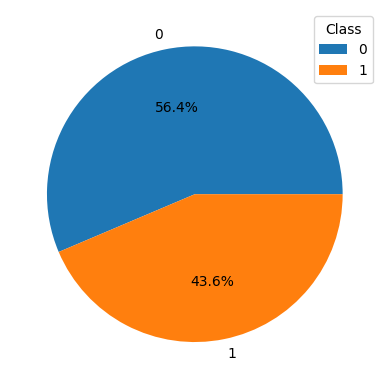

In [12]:
import matplotlib.pyplot as plt

# Calculate label distribution
label_counts = df['binary_column'].value_counts(normalize=True) * 100

# Plot
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
        colors=['#1f77b4', '#ff7f0e'])
plt.legend(title='Class', labels=label_counts.index.astype(str))
plt.show()

In [13]:
#df['phishing']=df['label'].apply(lambda x:1 if x=='phishing' else 0)

In [14]:
#df.shape

In [15]:
#df.head()

In [16]:
 #Features Extractions

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
featuresVector=cv.fit_transform(df.Text)#.toarray()y
tf=cv.get_feature_names_out()
df1 = pd.DataFrame(featuresVector.toarray(), columns=tf)

print(df1)
'/'

      00  000  00000  000000  00000e25  00000e251  00000e2511c8  000025558  \
0      0    1      0       0         0          0             0          0   
1      0    0      0       0         0          0             0          0   
2      0    0      0       0         0          0             0          0   
3      0    0      0       0         0          0             0          0   
4      0    0      0       0         0          0             0          0   
...   ..  ...    ...     ...       ...        ...           ...        ...   
4840   0    0      0       0         0          0             0          0   
4841   0    0      0       0         0          0             0          0   
4842   0    0      0       0         0          0             0          0   
4843   0    0      0       0         0          0             0          0   
4844   0    0      0       0         0          0             0          0   

      000066  000080  ...  zyae4r6a8n  \
0          0       0  

'/'

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df1,df.binary_column,test_size=0.2)

In [18]:
X_train.shape

(3876, 55824)

In [19]:
X_test.shape

(969, 55824)

In [20]:
y_train.value_counts()

,count
binary_column,
0,2186
1,1690


In [21]:
y_test.value_counts()

,count
binary_column,
0,546
1,423


In [22]:
type(X_train)

pandas.core.frame.DataFrame

In [23]:
X_train[:4]

,00,000,00000,000000,00000e25,00000e251,00000e2511c8,000025558,000066,000080,...,zyae4r6a8n,zyrj5chtwizwuhg1vmphpqvcxcielamylrzwhectxkd5jv8avh8a5nc,zz,zz6e3pavpu,zzdd5994a,zzn,zznobp9mn47zwp9h33jjtde0,zzs6xk5ijy9bzw97h1i,ʱʱ,쫷磬30
4654,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3309,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
type(y_train)

pandas.core.series.Series

In [25]:
y_train[:5]

,binary_column
4654,1
3309,1
2232,1
775,0
3940,0


In [26]:
type(X_train.values)

numpy.ndarray

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1,df.binary_column,test_size=0.8)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

969 3876
969 3876


#LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [29]:
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
X_test

,00,000,00000,000000,00000e25,00000e251,00000e2511c8,000025558,000066,000080,...,zyae4r6a8n,zyrj5chtwizwuhg1vmphpqvcxcielamylrzwhectxkd5jv8avh8a5nc,zz,zz6e3pavpu,zzdd5994a,zzn,zznobp9mn47zwp9h33jjtde0,zzs6xk5ijy9bzw97h1i,ʱʱ,쫷磬30
3915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
model.predict_proba(X_test)

array([[9.73633557e-01, 2.63664429e-02],
       [9.79380210e-01, 2.06197901e-02],
       [9.92051064e-01, 7.94893620e-03],
       ...,
       [2.22044605e-16, 1.00000000e+00],
       [9.78720360e-01, 2.12796401e-02],
       [9.72671727e-01, 2.73282727e-02]])

In [33]:
model.score(X_test,y_test)

0.9687822497420021

In [34]:

model.coef_

array([[5.25540075e-02, 1.64888414e-01, 4.58556170e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [35]:
model.intercept_

array([-2.83268789])

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9687822497420021


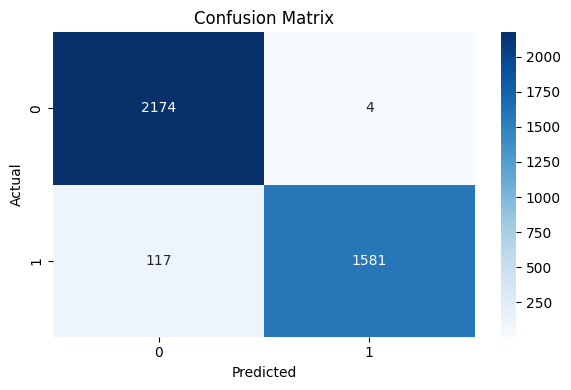

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test,y_predicted)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
sns.heatmap(cm,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix

# y_test : true labels
# y_pred : predicted labels
cm = confusion_matrix(y_test, y_predicted)

# Unpack
TN, FP, FN, TP = cm.ravel()

print(f"Confusion Matrix:\n{cm}")
print(f"\nTrue Negatives (TN) : {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP) : {TP}")

Confusion Matrix:
[[2174    4]
 [ 117 1581]]

True Negatives (TN) : 2174
False Positives (FP): 4
False Negatives (FN): 117
True Positives (TP) : 1581


In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9687822497420021


In [40]:
from sklearn.metrics import precision_score

# For binary classification
precision = precision_score(y_test, y_predicted)
print("Precision:", precision)

Precision: 0.9974763406940063


In [41]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_predicted)
print("Recall:", recall)

Recall: 0.931095406360424


In [42]:
from sklearn.metrics import f1_score
# F1-Score
f1 = f1_score(y_test, y_predicted)
print("F1-Score:", f1)

F1-Score: 0.9631434663417606


#naive_bayes

In [43]:
from sklearn. naive_bayes import GaussianNB, MultinomialNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [44]:
model.score(X_test,y_test )

0.9705882352941176

In [45]:
mn = MultinomialNB()
mn.fit(X_train,y_train)
mn.score(X_test,y_test)

0.8531991744066048

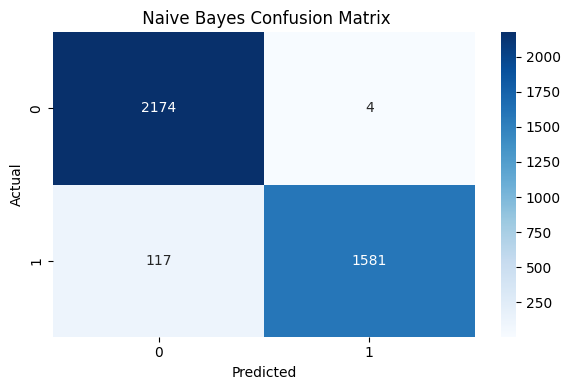

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
sns.heatmap(cm,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(' Naive Bayes Confusion Matrix')
plt.tight_layout()
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix

# y_test : true labels
# y_pred : predicted labels
cm = confusion_matrix(y_test, y_predicted)

# Unpack
TN, FP, FN, TP = cm.ravel()

print(f"Confusion Matrix:\n{cm}")
print(f"\nTrue Negatives (TN) : {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP) : {TP}")

Confusion Matrix:
[[2174    4]
 [ 117 1581]]

True Negatives (TN) : 2174
False Positives (FP): 4
False Negatives (FN): 117
True Positives (TP) : 1581


In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.9687822497420021


In [49]:
from sklearn.metrics import precision_score

# For binary classification
precision = precision_score(y_test, y_predicted)
print("Precision:", precision)

Precision: 0.9974763406940063


In [50]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_predicted)
print("Recall:", recall)

Recall: 0.931095406360424


In [51]:
from sklearn.metrics import f1_score
# F1-Score
f1 = f1_score(y_test, y_predicted)
print("F1-Score:", f1)

F1-Score: 0.9631434663417606


#DecisionTree

In [52]:
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [53]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred = model.predict(X_test)

In [55]:
model.score(X_test, y_test)

0.9432404540763674

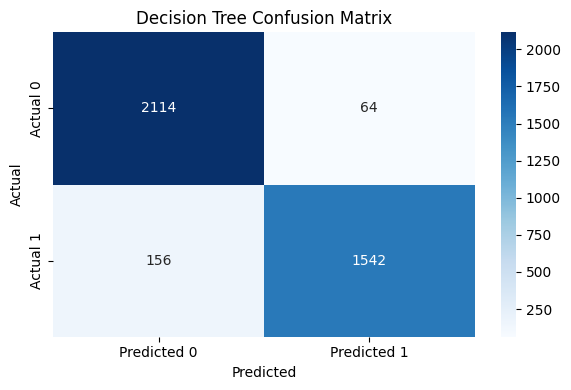

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout()
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix

# y_test : true labels
# y_pred : predicted labels
cm = confusion_matrix(y_test, y_pred)

# Unpack
TN, FP, FN, TP = cm.ravel()

print(f"Confusion Matrix:\n{cm}")
print(f"\nTrue Negatives (TN) : {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP) : {TP}")

Confusion Matrix:
[[2114   64]
 [ 156 1542]]

True Negatives (TN) : 2114
False Positives (FP): 64
False Negatives (FN): 156
True Positives (TP) : 1542


In [58]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9432404540763674


In [59]:
from sklearn.metrics import precision_score

# For binary classification
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9601494396014943


In [60]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9081272084805654


In [61]:
from sklearn.metrics import f1_score
# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.9334140435835351


#K-nearest-neighbor

In [62]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
y_pred = model.predict(X_test)

In [64]:
model.score(X_test, y_test)

0.9084107327141383

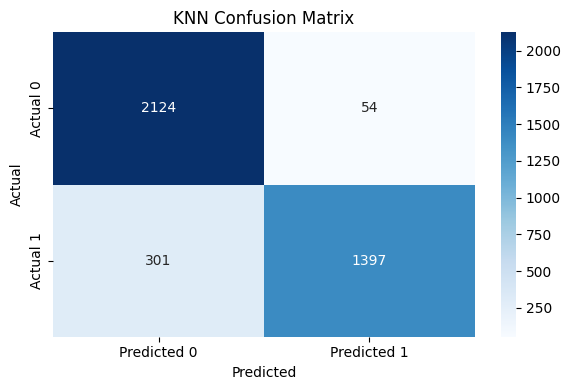

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.tight_layout()
plt.show()

In [66]:
from sklearn.metrics import confusion_matrix

# y_test : true labels
# y_pred : predicted labels
cm = confusion_matrix(y_test, y_pred)

# Unpack
TN, FP, FN, TP = cm.ravel()

print(f"Confusion Matrix:\n{cm}")
print(f"\nTrue Negatives (TN) : {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP) : {TP}")

Confusion Matrix:
[[2124   54]
 [ 301 1397]]

True Negatives (TN) : 2124
False Positives (FP): 54
False Negatives (FN): 301
True Positives (TP) : 1397


In [67]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9084107327141383


In [68]:
from sklearn.metrics import precision_score

# For binary classification
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9627842866988284


In [69]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.8227326266195524


In [70]:
from sklearn.metrics import f1_score
# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.8872657986662432


# #Random Forests

In [71]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
y_pred = model.predict(X_test)

In [73]:
model.score(X_test, y_test)

0.9484004127966976

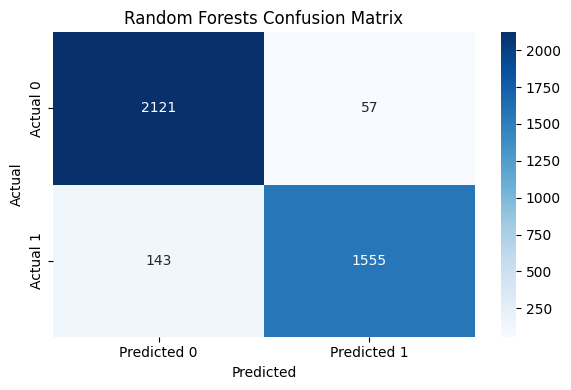

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forests Confusion Matrix')
plt.tight_layout()
plt.show()


In [75]:
from sklearn.metrics import confusion_matrix

# y_test : true labels
# y_pred : predicted labels
cm = confusion_matrix(y_test, y_pred)

# Unpack
TN, FP, FN, TP = cm.ravel()

print(f"Confusion Matrix:\n{cm}")
print(f"\nTrue Negatives (TN) : {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP) : {TP}")

Confusion Matrix:
[[2121   57]
 [ 143 1555]]

True Negatives (TN) : 2121
False Positives (FP): 57
False Negatives (FN): 143
True Positives (TP) : 1555


In [76]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9484004127966976


In [77]:
from sklearn.metrics import precision_score

# For binary classification
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9646401985111662


In [78]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9157832744405182


In [79]:
from sklearn.metrics import f1_score
# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.9395770392749244


#Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [81]:
y_pred = model.predict(X_test)

In [82]:
model.score(X_test, y_test)

0.9527863777089783

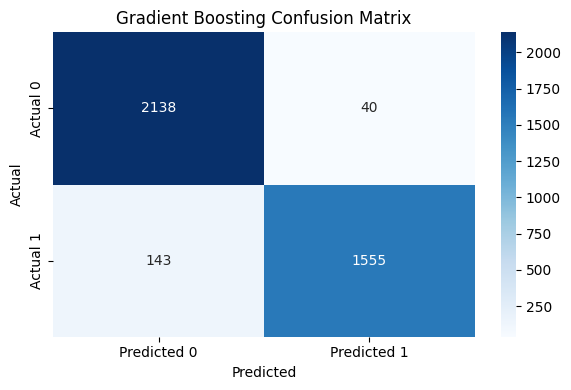

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.tight_layout()
plt.show()

In [84]:
from sklearn.metrics import confusion_matrix

# y_test : true labels
# y_pred : predicted labels
cm = confusion_matrix(y_test, y_pred)

# Unpack
TN, FP, FN, TP = cm.ravel()

print(f"Confusion Matrix:\n{cm}")
print(f"\nTrue Negatives (TN) : {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP) : {TP}")

Confusion Matrix:
[[2138   40]
 [ 143 1555]]

True Negatives (TN) : 2138
False Positives (FP): 40
False Negatives (FN): 143
True Positives (TP) : 1555


In [85]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9527863777089783


In [86]:
from sklearn.metrics import precision_score

# For binary classification
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9749216300940439


In [87]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9157832744405182


In [88]:
from sklearn.metrics import f1_score
# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.9444275736410568


#Support Vector Machines

In [89]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

SVC()

In [90]:
y_pred = model.predict(X_test)

In [91]:
model.score(X_test, y_test)

0.9143446852425181

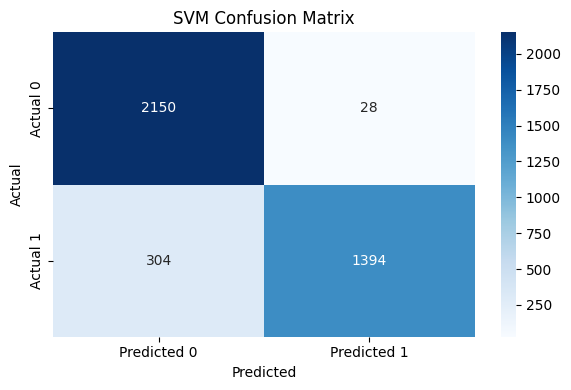

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.tight_layout()
plt.show()

In [93]:
from sklearn.metrics import confusion_matrix

# y_test : true labels
# y_pred : predicted labels
cm = confusion_matrix(y_test, y_pred)

# Unpack
TN, FP, FN, TP = cm.ravel()

print(f"Confusion Matrix:\n{cm}")
print(f"\nTrue Negatives (TN) : {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP) : {TP}")

Confusion Matrix:
[[2150   28]
 [ 304 1394]]

True Negatives (TN) : 2150
False Positives (FP): 28
False Negatives (FN): 304
True Positives (TP) : 1394


In [94]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9143446852425181


In [95]:
from sklearn.metrics import precision_score

# For binary classification
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.980309423347398


In [96]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.8209658421672555


In [97]:
from sklearn.metrics import f1_score
# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

F1-Score: 0.8935897435897436


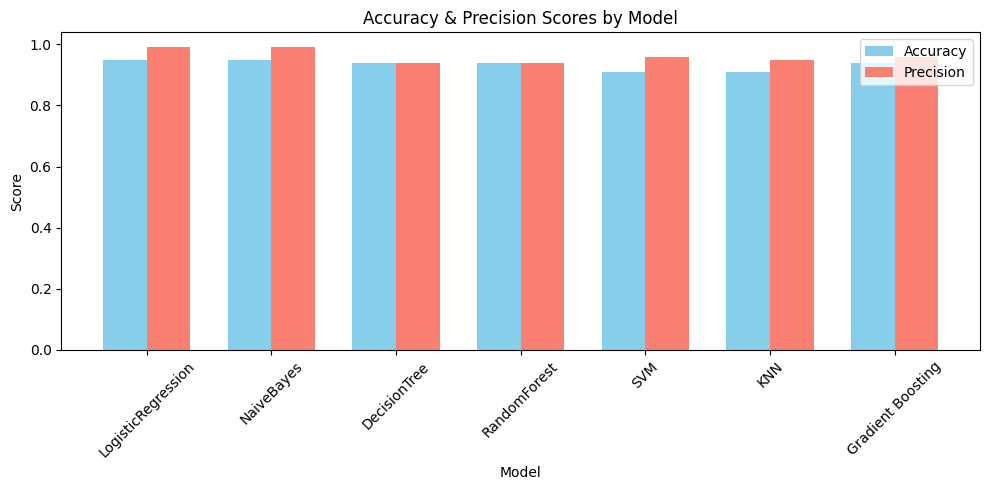

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['LogisticRegression','NaiveBayes','DecisionTree','RandomForest','SVM','KNN','Gradient Boosting']

# Example Accuracy and Precision scores
accuracy_scores = [0.95, 0.95, 0.94, 0.94, 0.91, 0.91, 0.94]
precision_scores = [0.99, 0.99, 0.94, 0.94, 0.96, 0.95, 0.96]

x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, precision_scores, width, label='Precision', color='salmon')

# Labels and title
ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.set_title('Accuracy & Precision Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

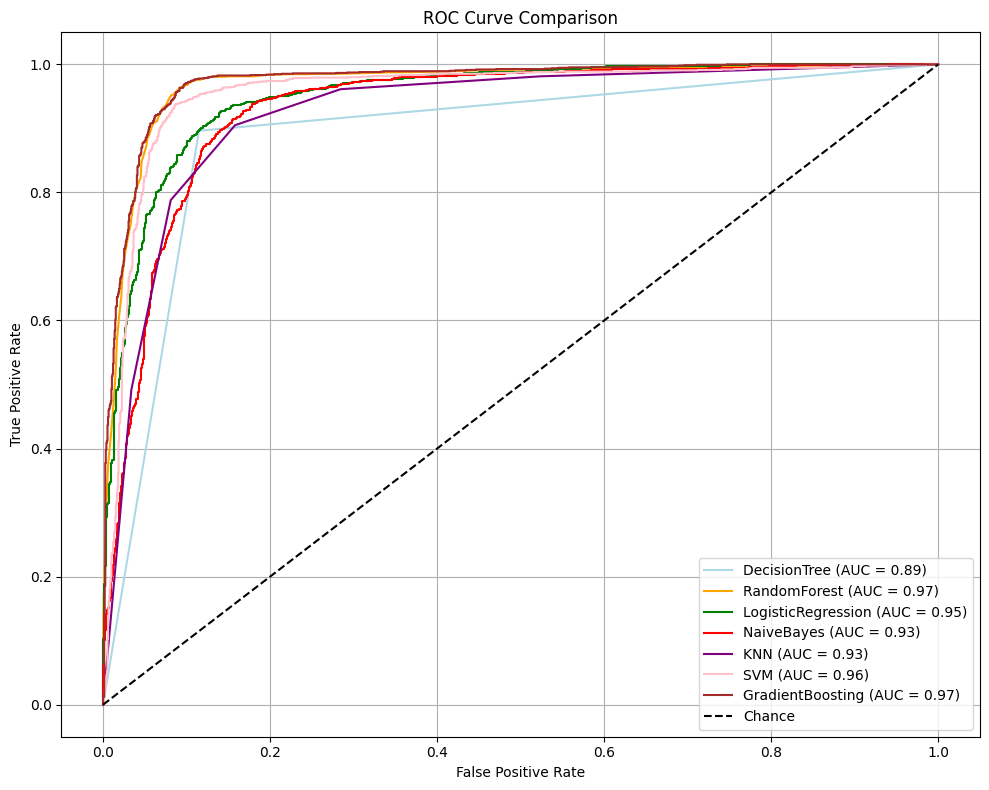

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.datasets import make_classification

# Generate synthetic binary classification data
X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers (now includes Gradient Boosting)
models = {
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "NaiveBayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "GradientBoosting": GradientBoostingClassifier()
}

# Plot setup
plt.figure(figsize=(10, 8))
plt.title('ROC Curve Comparison')

# Define colors for consistency
colors = ['lightblue', 'orange', 'green', 'red', 'purple', 'pink', 'brown']  # Added brown for Gradient Boosting

# Plot ROC curve for each classifier
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal chance line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Chance')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()
